In [1]:
#Importando os modulos que vou usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Lendo o arquivo csv de entrada nas bordas dos Estados Unidos
border = pd.read_csv("Border_Crossing_Entry_Data.csv")
border.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


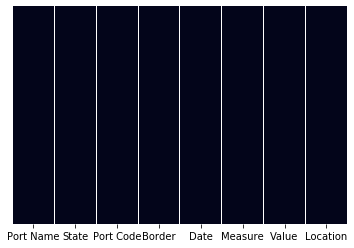

In [3]:
#verificando que esse DataFrame não tem nenhum valor nulo
sns.heatmap(border.isnull(), cbar=False, yticklabels=False);

In [4]:
#isso prova que Port Name e Port Code não dão as mesmas informações, por isso não dá para cortar nenhum dos dois
len(border["Port Name"].unique()) == len(border["Port Code"].unique()) 

False

In [15]:
#simplificando a coluna Date, a parte do horario não era necessario, já que todos são 12:00:00AM
states = list(border["State"].unique())
pnames = list(border["Port Name"].unique())
border["Date"] = border["Date"].apply(lambda x: x.replace(" 12:00:00 AM", ""))
border.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year
0,Calexico East,California,2507,US-Mexico Border,03/01/2019,Trucks,34447,POINT (-115.48433000000001 32.67524),2019
1,Van Buren,Maine,108,US-Canada Border,03/01/2019,Rail Containers Full,428,POINT (-67.94271 47.16207),2019
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019,Trucks,81217,POINT (-117.05333 32.57333),2019
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019,Trains,62,POINT (-110.93361 31.340279999999996),2019
4,Trout River,New York,715,US-Canada Border,03/01/2019,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019


In [13]:
#Foi criada a coluna Year a partir da coluna Date, para poder ver o quanto crescimento da entrada de pessoas por ano
border["Year"] = border["Date"].apply(lambda x: str(x.split("/")[2]))
border.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year
0,Calexico East,California,2507,US-Mexico Border,03/01/2019,Trucks,34447,POINT (-115.48433000000001 32.67524),2019
1,Van Buren,Maine,108,US-Canada Border,03/01/2019,Rail Containers Full,428,POINT (-67.94271 47.16207),2019
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019,Trucks,81217,POINT (-117.05333 32.57333),2019
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019,Trains,62,POINT (-110.93361 31.340279999999996),2019
4,Trout River,New York,715,US-Canada Border,03/01/2019,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019


In [21]:
#Resolvi juntar as colunas Port Name e Port Code, porque queria diminuir o numero de colunas para dar uma melhor olhada na tabela
#E nem todos os nomes erão equivalentes a um codigo de port
border["Port Name-Code"] = border.apply(lambda x: "-".join([x["Port Name"] ,str(x["Port Code"])]), axis=1)
border.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Port Name-Code
0,Calexico East,California,2507,US-Mexico Border,03/01/2019,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,Calexico East-2507
1,Van Buren,Maine,108,US-Canada Border,03/01/2019,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,Van Buren-108
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019,Trucks,81217,POINT (-117.05333 32.57333),2019,Otay Mesa-2506
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019,Trains,62,POINT (-110.93361 31.340279999999996),2019,Nogales-2604
4,Trout River,New York,715,US-Canada Border,03/01/2019,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,Trout River-715


In [22]:
#Cortei as tabelas que continham informções desnecessarias para a minha analise
border.drop(columns=['Date', "Location", "Port Name", "Port Code"], inplace=True)
border.head()

,State,Border,Measure,Value,Year,Port Name-Code
0,California,US-Mexico Border,Trucks,34447,2019,Calexico East-2507
1,Maine,US-Canada Border,Rail Containers Full,428,2019,Van Buren-108
2,California,US-Mexico Border,Trucks,81217,2019,Otay Mesa-2506
3,Arizona,US-Mexico Border,Trains,62,2019,Nogales-2604
4,New York,US-Canada Border,Personal Vehicle Passengers,16377,2019,Trout River-715


In [23]:
#Arrumando os indexs para poder selecionar a região e borda de uma forma separada
borderdiv = border.set_index(keys = ["Border"])
borderdiv.head()

,State,Measure,Value,Year,Port Name-Code
Border,,,,,
US-Mexico Border,California,Trucks,34447,2019,Calexico East-2507
US-Canada Border,Maine,Rail Containers Full,428,2019,Van Buren-108
US-Mexico Border,California,Trucks,81217,2019,Otay Mesa-2506
US-Mexico Border,Arizona,Trains,62,2019,Nogales-2604
US-Canada Border,New York,Personal Vehicle Passengers,16377,2019,Trout River-715


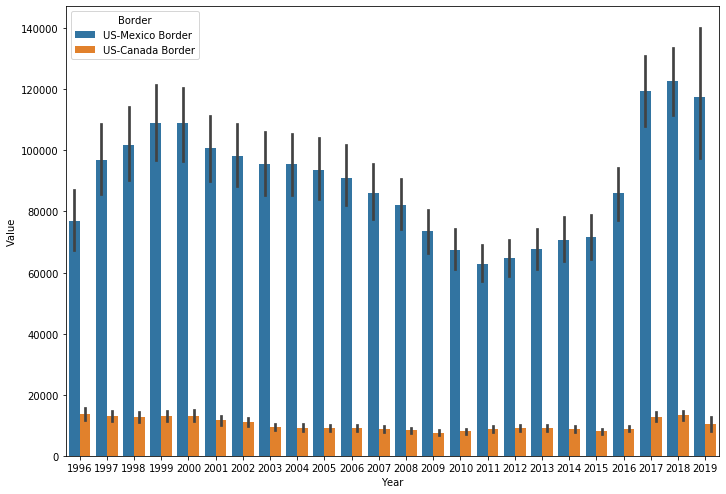

In [8]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Year',y='Value',data=border, hue="Border", ax=ax);
#Esse grafico mostra a oscilação de entrada nas bordas, entre 1996 e 2019

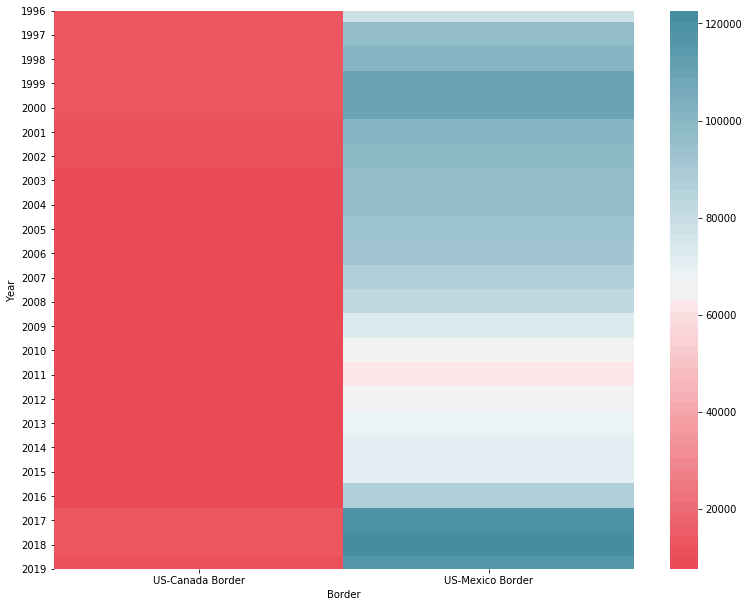

In [24]:
a4_dims = (13, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(border.pivot_table(values="Value", index="Year", columns="Border"), cmap=sns.diverging_palette(10, 220,  n=50, l=55), ax=ax);
#Esse heatmap mostra a oscilação de entrada nas bordas, entre 1996 e 2019

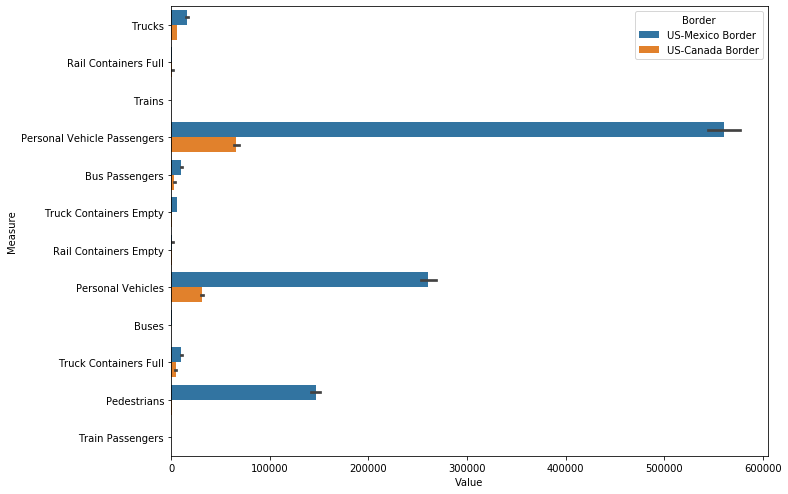

In [25]:
a4_dims = (10.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Value',y='Measure',data=border, hue="Border", ax=ax); 
#Esse grafico mostra os meios de entrada, e a difença entre as bordas

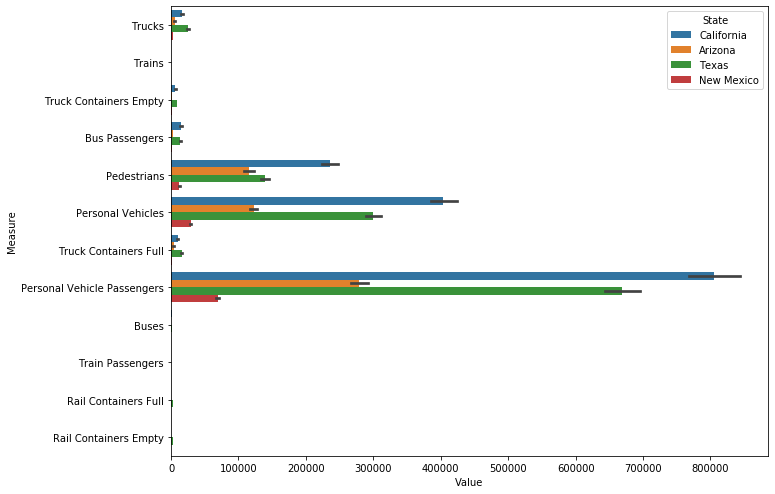

In [26]:
a4_dims = (10.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Value',y='Measure',data=borderdiv.loc["US-Mexico Border"], hue="State", ax=ax);
#Esse grafico mostra os meios de entrada, e a difença entre os estados, na borda com Mexico

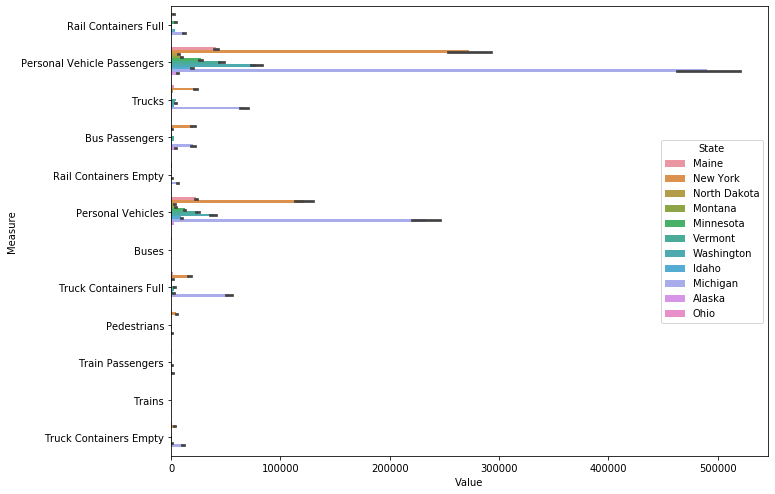

In [27]:
a4_dims = (10.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Value',y='Measure',data=borderdiv.loc["US-Canada Border"], hue="State", ax=ax);
#Esse grafico mostra os meios de entrada, e a difença entre os estados, na borda com Canada

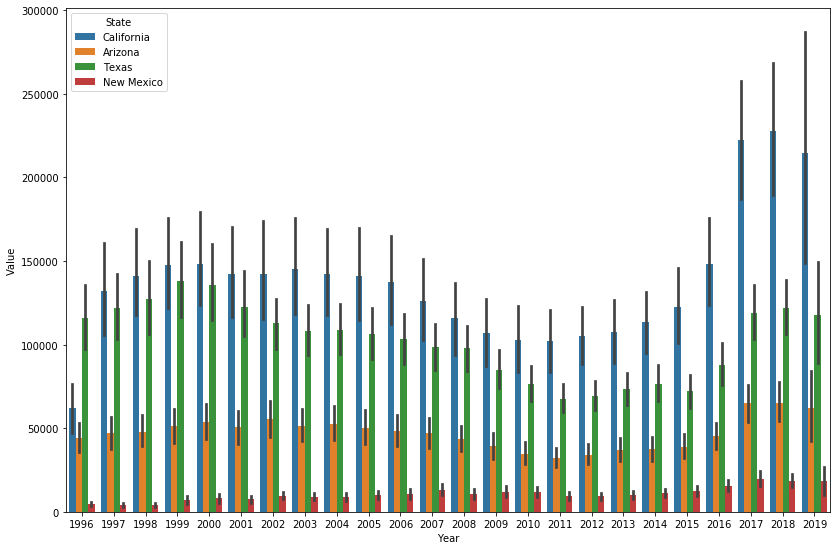

In [11]:
a4_dims = (13.7, 9.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Year',y='Value',data=borderdiv.loc["US-Mexico Border"], hue="State", ax=ax);
#Esse grafico mostra a oscilação de entrada por estado, na borda com o Mexico

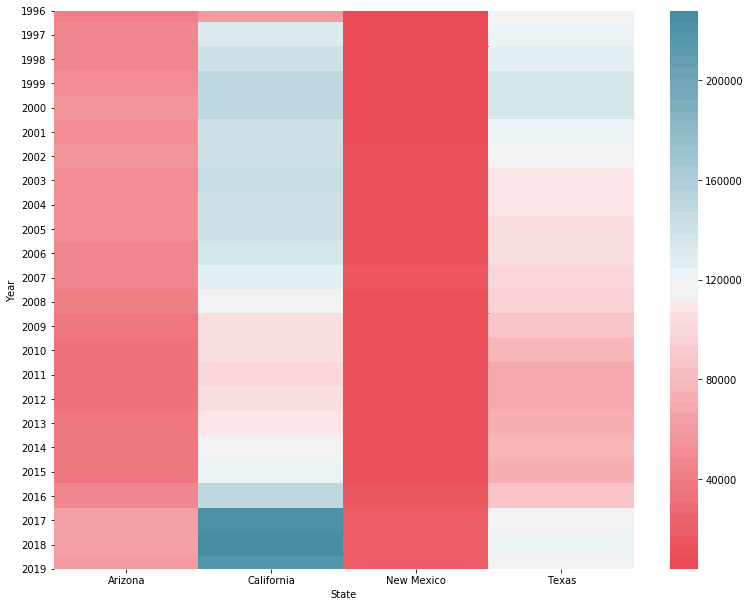

In [12]:
a4_dims = (13, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(borderdiv.loc["US-Mexico Border"].pivot_table(values="Value", index="Year", columns="State"), cmap=sns.diverging_palette(10, 220,  n=50, l=55), ax=ax);
#Esse heatmap mostra a oscilação de entrada por estado, na borda com o Mexico

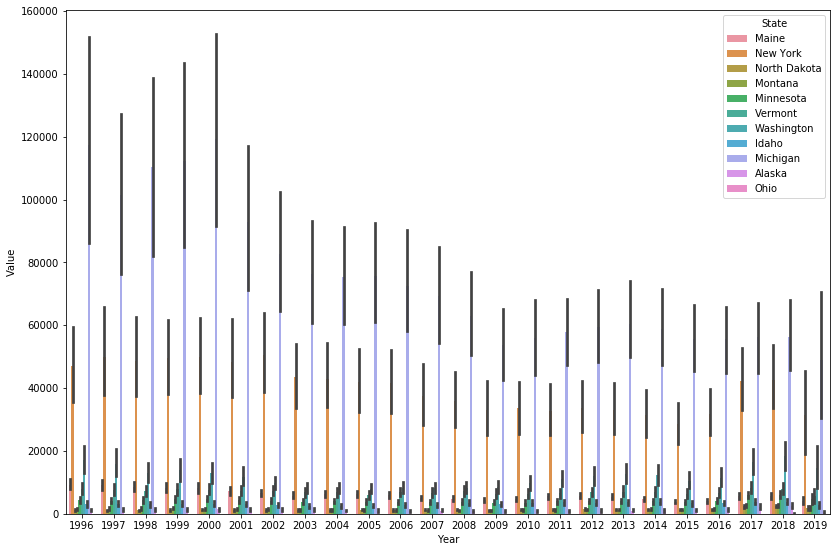

In [13]:
a4_dims = (13.7, 9.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Year',y='Value',data=borderdiv.loc["US-Canada Border"], hue="State", ax=ax);
#Esse grafico mostra a oscilação de entrada por estado, na borda com o Canada

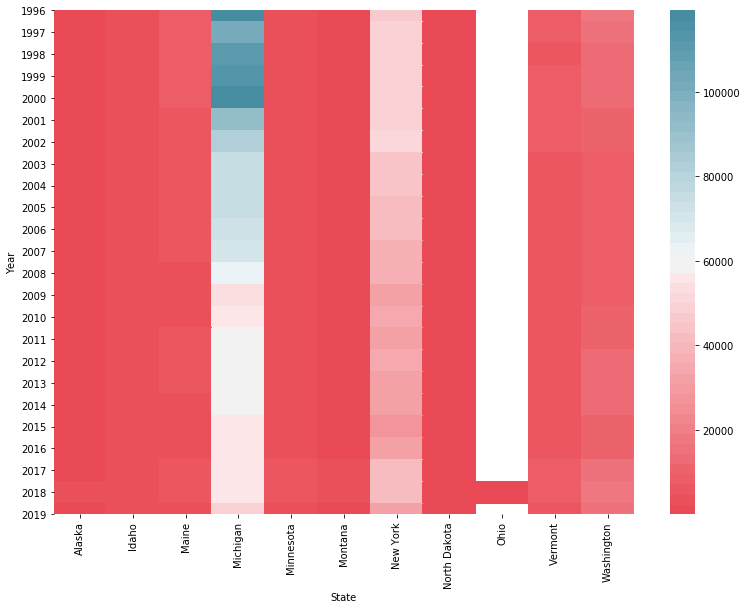

In [14]:
a4_dims = (13, 9.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(borderdiv.loc["US-Canada Border"].pivot_table(values="Value", index="Year", columns="State"), cmap=sns.diverging_palette(10, 220,  n=50, l=55), ax=ax);
#Esse heatmap mostra a oscilação de entrada por estado, na borda com o Canada